In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('df.csv')

In [4]:
df

,Age,Gender,Location,Debt,Owns Property,Platform,Total Time Spent,Video Category,Engagement,Frequency,ProductivityLoss,Satisfaction,Watch Reason,Watch Time,Self Control,Addiction Level
0,56,Male,Pakistan,True,True,Instagram,less,Pranks,high,Night,3,7,Procrastination,9:00 PM,5,high
1,46,Female,Mexico,False,True,Instagram,high,Pranks,moderate,Afternoon,5,5,Habit,5:00 PM,7,moderate
2,32,Female,United States,False,True,Facebook,less,Vlogs,high,Evening,6,4,Entertainment,2:00 PM,8,low
3,60,Male,Barzil,True,False,YouTube,less,Vlogs,less,Night,3,7,Habit,9:00 PM,5,high
4,25,Male,Pakistan,False,True,TikTok,moderate,Gaming,moderate,Morning,8,2,Boredom,8:00 AM,10,no addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Male,India,True,True,TikTok,moderate,Gaming,moderate,Afternoon,9,1,Procrastination,5:45 PM,10,no addiction
996,40,Female,Pakistan,False,False,Facebook,high,Life Hacks,less,Night,8,2,Boredom,10:15 PM,10,no addiction
997,27,Male,India,True,True,TikTok,moderate,Pranks,high,Night,9,1,Procrastination,10:15 PM,10,no addiction
998,61,Male,Pakistan,True,False,YouTube,moderate,Life Hacks,less,Night,3,7,Procrastination,10:15 PM,5,high


In [5]:
temp_df = df.drop(columns=['ProductivityLoss','Self Control'])

In [8]:
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Assuming df is already defined
X = df.drop('Addiction Level', axis=1)
y = df['Addiction Level']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identifying the categorical and numerical columns
categorical_cols = ['Gender', 'Location', 'Platform', 'Video Category', 'Engagement', 'Frequency', 'Watch Reason', 'Watch Time']
numerical_cols = ['Age', 'ProductivityLoss', 'Satisfaction', 'Self Control']

# Column transformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Defining pipelines for different models
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# List of pipelines to iterate over
pipelines = [('Logistic Regression', logreg_pipeline), 
             ('Random Forest', rf_pipeline), 
             ('SVM', svc_pipeline)]

# Training and saving models
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Save each model individually
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(pipeline, file)

print("Models saved successfully.")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

     extreme       1.00      0.83      0.90        23
        high       0.95      1.00      0.97        76
         low       0.97      1.00      0.98        87
    moderate       1.00      0.95      0.97        58
no addiction       1.00      1.00      1.00        56

    accuracy                           0.98       300
   macro avg       0.98      0.95      0.97       300
weighted avg       0.98      0.98      0.98       300

Random Forest Classification Report:
              precision    recall  f1-score   support

     extreme       1.00      1.00      1.00        23
        high       1.00      1.00      1.00        76
         low       1.00      1.00      1.00        87
    moderate       1.00      0.98      0.99        58
no addiction       0.98      1.00      0.99        56

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       3

In [11]:
temp_df

,Age,Gender,Location,Debt,Owns Property,Platform,Total Time Spent,Video Category,Engagement,Frequency,Satisfaction,Watch Reason,Watch Time,Addiction Level
0,56,Male,Pakistan,True,True,Instagram,less,Pranks,high,Night,7,Procrastination,9:00 PM,high
1,46,Female,Mexico,False,True,Instagram,high,Pranks,moderate,Afternoon,5,Habit,5:00 PM,moderate
2,32,Female,United States,False,True,Facebook,less,Vlogs,high,Evening,4,Entertainment,2:00 PM,low
3,60,Male,Barzil,True,False,YouTube,less,Vlogs,less,Night,7,Habit,9:00 PM,high
4,25,Male,Pakistan,False,True,TikTok,moderate,Gaming,moderate,Morning,2,Boredom,8:00 AM,no addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Male,India,True,True,TikTok,moderate,Gaming,moderate,Afternoon,1,Procrastination,5:45 PM,no addiction
996,40,Female,Pakistan,False,False,Facebook,high,Life Hacks,less,Night,2,Boredom,10:15 PM,no addiction
997,27,Male,India,True,True,TikTok,moderate,Pranks,high,Night,1,Procrastination,10:15 PM,no addiction
998,61,Male,Pakistan,True,False,YouTube,moderate,Life Hacks,less,Night,7,Procrastination,10:15 PM,high


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\TIRTH PATEL\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Model accuracy: 0.9966666666666667
Classification Report:
               precision    recall  f1-score   support

     extreme       1.00      1.00      1.00        23
        high       1.00      1.00      1.00        76
         low       1.00      1.00      1.00        87
    moderate       1.00      0.98      0.99        58
no addiction       0.98      1.00      0.99        56

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Top 5 Features:
Frequency_Afternoon: 0.5114
Watch Time_4:25 PM: 0.2756
Satisfaction: 0.1579
Watch Time_3:55 PM: 0.0270
Watch Time_10:15 PM: 0.0034


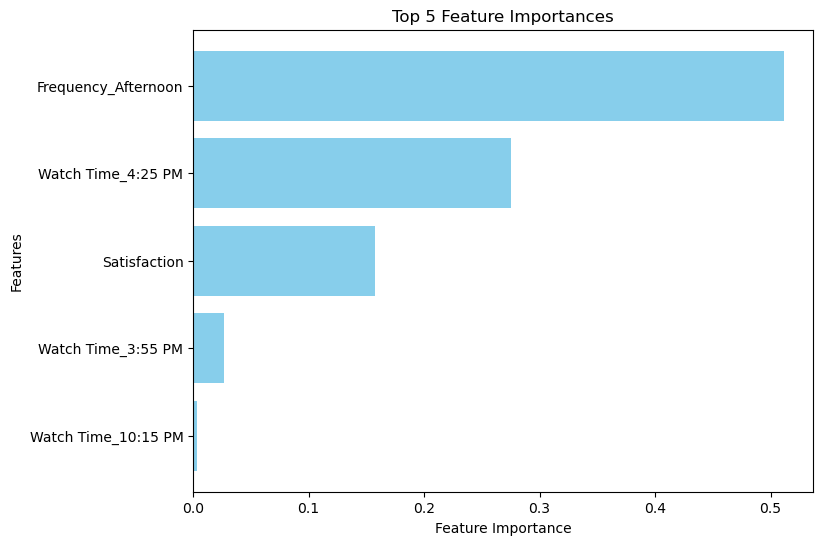

Model saved as xgboost_model.pkl


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Assuming df is already defined
# Replace this with your actual dataset loading code
# Example:
# df = pd.read_csv("your_dataset.csv")

# Define features and target
X = temp_df.drop('Addiction Level', axis=1)
y = temp_df['Addiction Level']

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Identifying the categorical and numerical columns
categorical_cols = ['Gender', 'Location', 'Platform', 'Video Category', 'Engagement', 'Frequency', 'Watch Reason', 'Watch Time']
numerical_cols = ['Age','Satisfaction']

# Column transformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Preprocessing function
def preprocess_data(X):
    return preprocessor.fit_transform(X)

# Preprocess train and test data
X_train_transformed = preprocess_data(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Medium-Level Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

# Best Model after Tuning
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions
preds = best_model.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print("Model accuracy:", accuracy)

# Classification Report
report = classification_report(y_test, preds, target_names=label_encoder.classes_)
print("Classification Report:\n", report)

# Feature Importance Analysis
feature_names = (numerical_cols + 
                 list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))

feature_importances = best_model.feature_importances_

# Extract top 10 features
top_5_idx = np.argsort(feature_importances)[-5:]
top_5_features = np.array(feature_names)[top_5_idx]
top_5_importances = feature_importances[top_5_idx]

# Display top 10 features
print("Top 5 Features:")
for feature, importance in zip(top_5_features[::-1], top_5_importances[::-1]):
    print(f"{feature}: {importance:.4f}")

# Plot top 10 feature importances
plt.figure(figsize=(8, 6))
plt.barh(top_5_features, top_5_importances, color="skyblue")
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 5 Feature Importances')
plt.show()

# Save the model to a .pkl file
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print("Model saved as xgboost_model.pkl")
